In [1]:
# Import necessery libraries :
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
#Loading the data:
df_fundamentals=pd.read_csv('regression/fundamentals.csv')
df_prices=pd.read_csv('regression/prices-split-adjusted.csv')
df_securities=pd.read_csv('regression/securities.csv')

In [3]:
# Visualize and Clean for fundamentals dataset 
df_fundamentals.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,...,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,...,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,...,11750000000.00,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,4.02,716915422.89
3,3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,51.00,...,9985000000.00,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,11.39,668129938.54
4,4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,23.00,...,3184200000.00,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,5.29,73283553.88


In [4]:
# df_fundamentals_sort=df_fundamentals.sort_values(by='Period Ending', ascending=True)
# display(df_fundamentals_sort)
df_fundamentals.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1482.00,1781.00,1781.00,...,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1781.00,1608.00,1562.00,1562.00
mean,890.00,4673417755.76,-63534842.22,69089399.21,43.60,-1251924663.11,5351783833.24,74.46,8521399416.06,-67877487.37,...,6726348593.49,4699918938.80,11888455635.60,43804202904.55,55692658540.15,20291543427.85,-3951522290.29,2013.31,3.35,602424367.65
std,514.27,14060472820.10,756279433.68,684814332.32,233.92,2979962962.67,11339771504.63,102.30,54321046048.25,390336885.93,...,13448000447.72,9538832077.25,25844289612.86,181703864897.77,203361247941.49,40953552282.36,14070468017.89,19.95,4.70,1142584658.62
min,0.00,0.00,-6452000000.00,-6768000000.00,0.00,-37985000000.00,-721500000.00,0.00,21000.00,-5562000000.00,...,0.00,0.00,-13244000000.00,2577000.00,2705000.00,1514000.00,-229734000000.00,1215.00,-61.20,-1513945000.00
25%,445.00,516000000.00,-104000000.00,-2638000.00,10.00,-1151200000.00,479100000.00,17.00,308800000.00,-54000000.00,...,1044178000.00,564076000.00,2201492000.00,3843300000.00,6552689000.00,3714000000.00,-3040895000.00,2013.00,1.59,149331761.19
50%,890.00,1334000000.00,-18300000.00,2000000.00,16.00,-358000000.00,1997080000.00,41.00,862590000.00,0.00,...,2747200000.00,1701500000.00,4983000000.00,9141000000.00,15170000000.00,8023200000.00,-306835000.00,2014.00,2.81,292940893.61
75%,1335.00,3246000000.00,7816000.00,33592000.00,26.00,-129100000.00,5735000000.00,90.00,2310000000.00,0.00,...,6162000000.00,4381000000.00,10809000000.00,23897000000.00,35997100000.00,17486000000.00,0.00,2015.00,4.59,549216251.59
max,1780.00,206939000000.00,22664000000.00,14162000000.00,5789.00,5000000.00,108288000000.00,1041.00,728111000000.00,3755000000.00,...,139660000000.00,90281000000.00,256205000000.00,2340547000000.00,2572274000000.00,485651000000.00,0.00,2016.00,50.09,16107692307.70


In [6]:
df_fundamentals=df_fundamentals.drop("Unnamed: 0", axis=1)

In [7]:
# display(df_fundamentals.info())
# There are some columns contain some empty rows 
#  we will display those columns 
df_fundamentals[df_fundamentals.columns[df_fundamentals.isna().any()]]
#  df_fundamentals.isna().any() it gives True to columns that contain at least one raw with NaN value

,Cash Ratio,Current Ratio,Quick Ratio,For Year,Earnings Per Share,Estimated Shares Outstanding
0,53.00,78.00,72.00,2012.00,-5.60,335000000.00
1,75.00,104.00,96.00,2013.00,-11.25,163022222.22
2,60.00,88.00,80.00,2014.00,4.02,716915422.89
3,51.00,73.00,67.00,2015.00,11.39,668129938.54
4,23.00,124.00,34.00,2012.00,5.29,73283553.88
...,...,...,...,...,...,...
1776,NaN,NaN,NaN,2015.00,1.20,257892500.00
1777,43.00,237.00,146.00,2013.00,1.01,499009900.99
1778,81.00,319.00,200.00,2014.00,1.16,502586206.90
1779,65.00,215.00,133.00,2015.00,0.68,498529411.76


<Axes: xlabel='Earnings Per Share', ylabel='Density'>

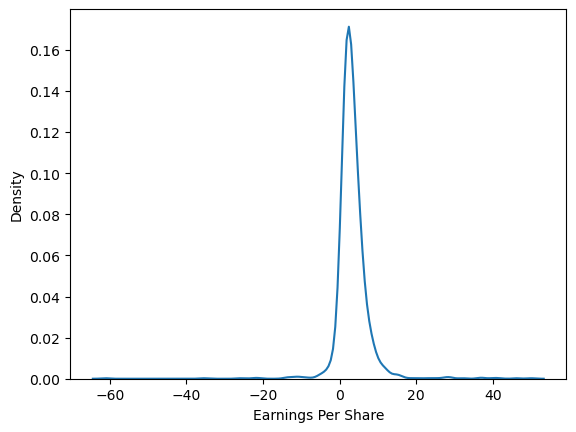

In [8]:
# sns.kdeplot(data=df_fundamentals,x="Cash Ratio")
# sns.kdeplot(data=df_fundamentals,x="Current Ratio")
# sns.kdeplot(data=df_fundamentals,x="Quick Ratio")
# sns.kdeplot(data=df_fundamentals,x="Estimated Shares Outstanding")
sns.kdeplot(data=df_fundamentals,x="Earnings Per Share")
# we are getting positively skewed distribution but it is extremely skewed so we'll perform grouped mean

In [18]:
# Convert column period Ending to datatime :
df_fundamentals['Period Ending']=pd.to_datetime(df_fundamentals['Period Ending'])

# NOW Lets Try to fill missig values with convenable values 
# ( we will compare between mean() and median() to choose one of them to fill the data)
df_fundamentals.groupby('Ticker Symbol')[['Cash Ratio','Current Ratio','Quick Ratio']].median()


,Cash Ratio,Current Ratio,Quick Ratio
Ticker Symbol,,,
AAL,56.50,83.00,76.00
AAP,13.00,130.00,28.00
AAPL,68.50,123.00,120.50
ABBV,97.50,188.50,172.00
ABC,10.00,95.50,48.50
...,...,...,...
YHOO,289.00,406.50,406.50
YUM,29.00,69.50,57.00
ZBH,170.50,414.00,304.00


In [26]:
# df_fundamentals.groupby('Ticker Symbol')[['Cash Ratio','Current Ratio','Quick Ratio']].mean()
# it seems that mean() gives a souhitable result than median()
df_fundamentals[["Cash Ratio","Current Ratio","Quick Ratio"]].fillna((df_fundamentals[["Cash Ratio","Current Ratio","Quick Ratio"]]).mean(), inplace=True) 


,Cash Ratio,Current Ratio,Quick Ratio
0,74.46,186.77,146.95
1,74.46,186.77,146.95
2,74.46,186.77,146.95
3,74.46,186.77,146.95
4,74.46,186.77,146.95
...,...,...,...
1776,74.46,186.77,146.95
1777,74.46,186.77,146.95
1778,74.46,186.77,146.95
1779,74.46,186.77,146.95


In [20]:
df_fundamentals.groupby('Ticker Symbol')['Earnings Per Share'].mean()

Ticker Symbol
AAL    -0.36
AAP     5.96
AAPL   16.04
ABBV    2.28
ABC     2.30
        ... 
YHOO    1.90
YUM     2.80
ZBH     3.46
ZION    1.36
ZTS     0.95
Name: Earnings Per Share, Length: 448, dtype: float64

In [29]:
# df_fundamentals.groupby('Ticker Symbol')['Earnings Per Share'].median()
# it seems that median() gives a souhitable result than mean()
df_fundamentals['Earnings Per Share'].fillna((df_fundamentals['Earnings Per Share']).median(), inplace=True)
df_fundamentals['Earnings Per Share']

0      2.81
1      2.81
2      2.81
3      2.81
4      2.81
       ... 
1776   2.81
1777   2.81
1778   2.81
1779   2.81
1780   2.81
Name: Earnings Per Share, Length: 1781, dtype: float64

In [22]:
df_fundamentals.groupby('Ticker Symbol')['Estimated Shares Outstanding'].median()


Ticker Symbol
AAL     501564969.27
AAP      73221406.57
AAPL   5612580399.55
ABBV   1600000000.00
ABC     223812731.36
            ...     
YHOO   1019693152.23
YUM     448078505.52
ZBH     174288490.89
ZION    247536130.95
ZTS     499009900.99
Name: Estimated Shares Outstanding, Length: 448, dtype: float64

In [30]:
df_fundamentals.groupby('Ticker Symbol')['Estimated Shares Outstanding'].mean()
# it seems that mean() gives a souhitable result than median()
df_fundamentals['Estimated Shares Outstanding'].fillna((df_fundamentals['Estimated Shares Outstanding']).mean(),inplace=True)
df_fundamentals['Estimated Shares Outstanding']

0      602424367.65
1      602424367.65
2      602424367.65
3      602424367.65
4      602424367.65
           ...     
1776   602424367.65
1777   602424367.65
1778   602424367.65
1779   602424367.65
1780   602424367.65
Name: Estimated Shares Outstanding, Length: 1781, dtype: float64

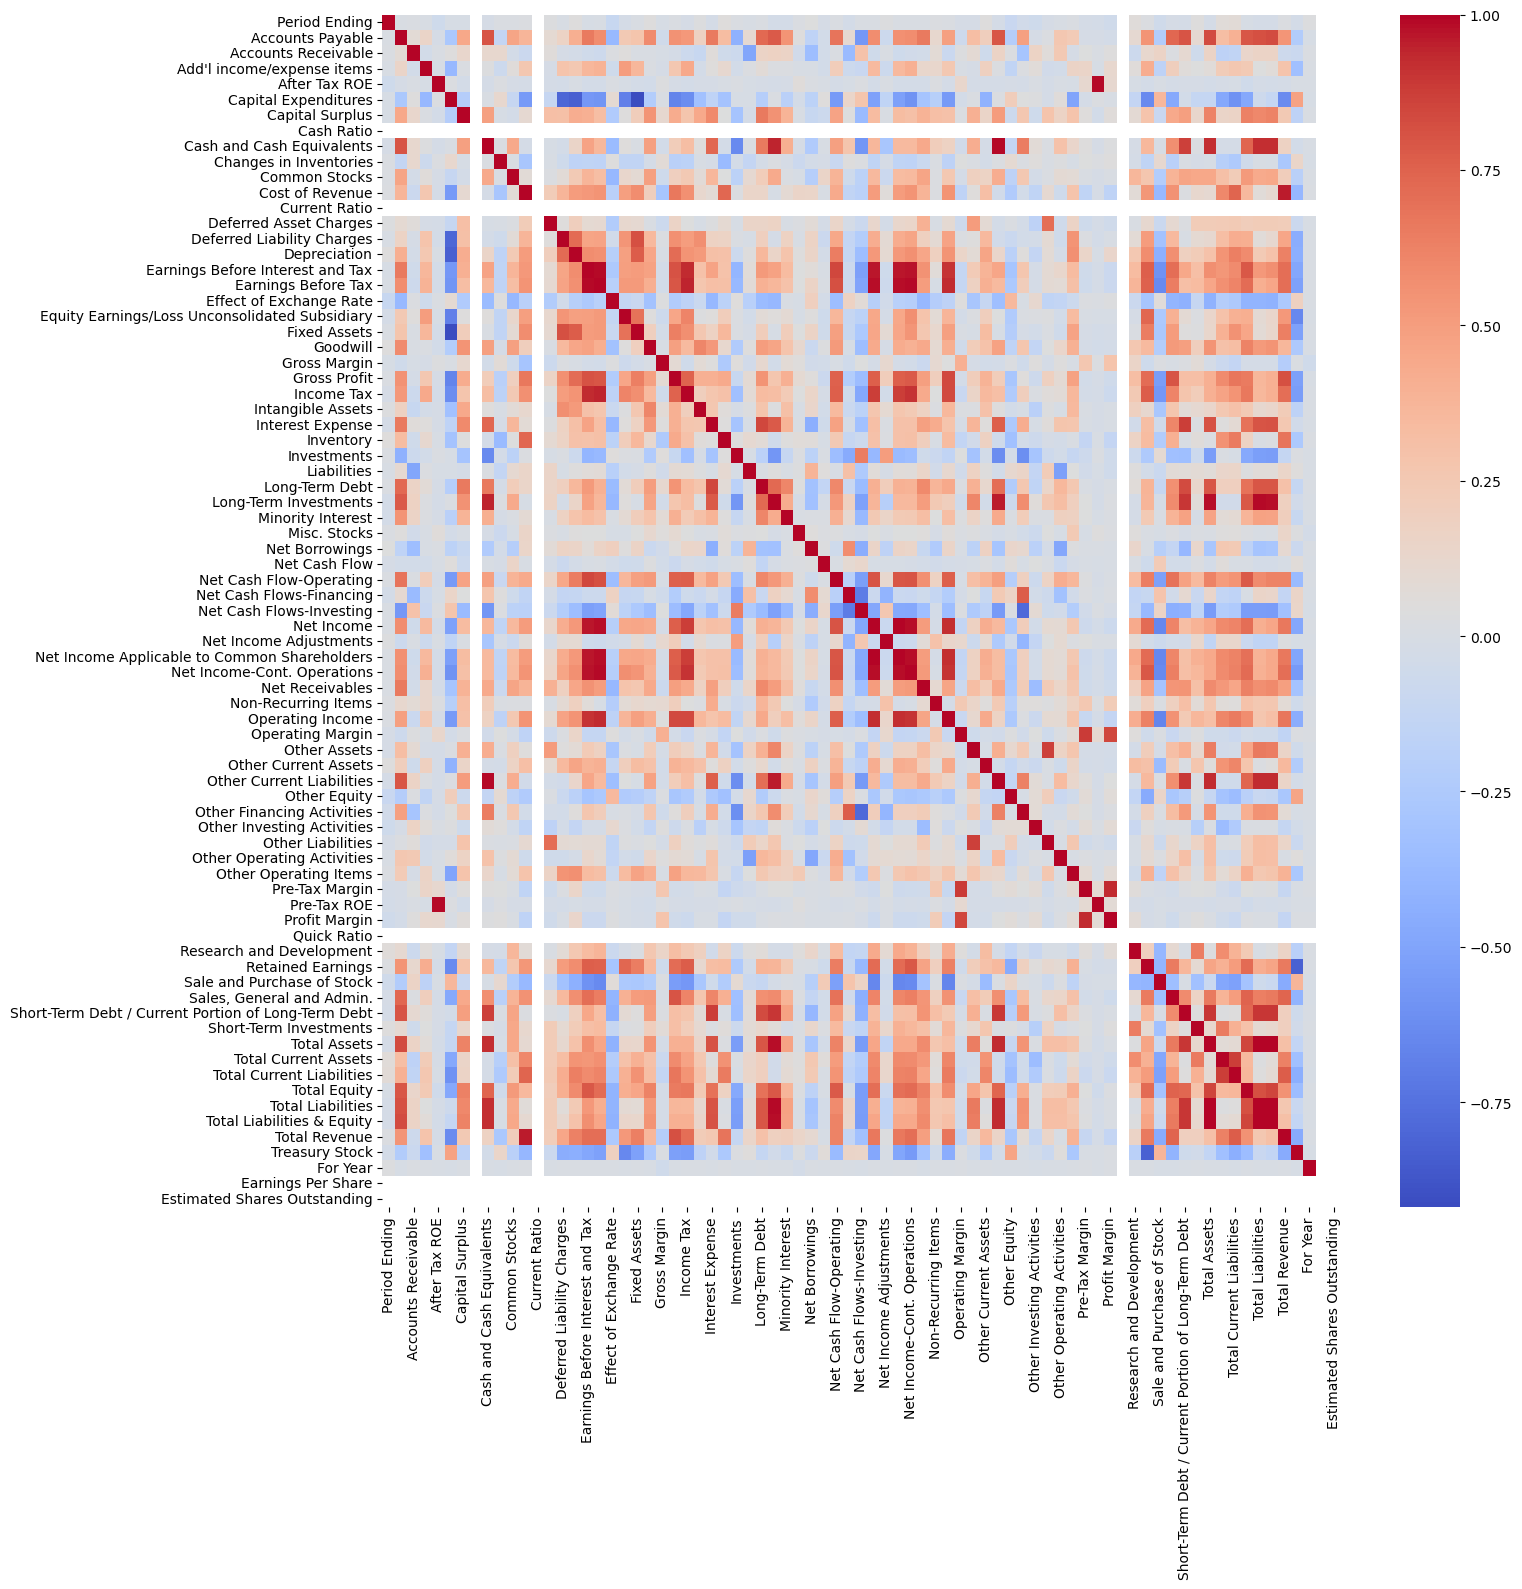

In [32]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_fundamentals.iloc[:,1:].corr(), annot=False, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [50]:
# Datetime Features
print("Before Adding Datetime Features:", df_prices.shape)

df_prices['month'] = df_prices["date"].dt.month
df_prices['day'] = df_prices["date"].dt.day
df_prices['weekofyear'] = df_prices["date"].dt.isocalendar().week  # Updated to 'weekofyear'
df_prices['dayofweek'] = df_prices["date"].dt.weekday
df_prices['quarter'] = df_prices["date"].dt.quarter

print("AfterAdding Datetime Features:", df_prices.shape)
display(df_prices)

Before Adding Datetime Features: (851264, 12)
AfterAdding Datetime Features: (851264, 12)


,date,symbol,open,close,low,high,volume,month,day,weekofyear,dayofweek,quarter
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00,1,5,1,1,1
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00,1,6,1,2,1
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00,1,7,1,3,1
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00,1,8,1,4,1
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00,1,11,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.31,103.20,102.85,103.93,973800.00,12,30,52,4,4
851260,2016-12-30,ZION,43.07,43.04,42.69,43.31,1938100.00,12,30,52,4,4
851261,2016-12-30,ZTS,53.64,53.53,53.27,53.74,1701200.00,12,30,52,4,4
851262,2016-12-30,AIV,44.73,45.45,44.41,45.59,1380900.00,12,30,52,4,4


In [51]:
# Datetime Features
print("Before Adding Datetime Features:", df_fundamentals.shape)

df_fundamentals["Period Ending"] = pd.to_datetime(df_fundamentals["Period Ending"])
df_fundamentals["First_Date_Tech"] = df_fundamentals["Period Ending"] + pd.Timedelta(days=1)
df_fundamentals['Last_Date_Tech'] = df_fundamentals.groupby("Ticker Symbol")["Period Ending"].shift(-1)
df_fundamentals['Last_Date_Tech'] = df_fundamentals['Last_Date_Tech'].fillna(df_fundamentals['Period Ending'] + pd.offsets.DateOffset(years=1))

print(" After Adding Datetime Features:", df_fundamentals.shape)

df_fundamentals

Before Adding Datetime Features: (1781, 78)
 After Adding Datetime Features: (1781, 80)


,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding,First_Date_Tech,Last_Date_Tech
0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,74.46,1330000000.00,...,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,2.81,602424367.65,2013-01-01,2013-12-31
1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,74.46,2175000000.00,...,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,2.81,602424367.65,2014-01-01,2014-12-31
2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,74.46,1768000000.00,...,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2014.00,2.81,602424367.65,2015-01-01,2015-12-31
3,AAL,2015-12-31,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,74.46,1085000000.00,...,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2015.00,2.81,602424367.65,2016-01-01,2016-12-31
4,AAP,2012-12-29,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,74.46,598111000.00,...,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2012.00,2.81,602424367.65,2012-12-30,2013-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,ZION,2015-12-31,0.00,0.00,-2530000.00,4.00,-157361000.00,0.00,74.46,15763133000.00,...,7507519000.00,52162006000.00,59669525000.00,2210591000.00,0.00,2015.00,2.81,602424367.65,2016-01-01,2016-12-31
1777,ZTS,2013-12-31,1381000000.00,-99000000.00,9000000.00,54.00,-184000000.00,878000000.00,74.46,610000000.00,...,940000000.00,5618000000.00,6558000000.00,4561000000.00,0.00,2013.00,2.81,602424367.65,2014-01-01,2014-12-31
1778,ZTS,2014-12-31,1071000000.00,69000000.00,-7000000.00,44.00,-180000000.00,958000000.00,74.46,882000000.00,...,1311000000.00,5277000000.00,6588000000.00,4785000000.00,0.00,2014.00,2.81,602424367.65,2015-01-01,2015-12-31
1779,ZTS,2015-12-31,1313000000.00,-58000000.00,-81000000.00,32.00,-224000000.00,1012000000.00,74.46,1154000000.00,...,1068000000.00,6845000000.00,7913000000.00,4765000000.00,-203000000.00,2015.00,2.81,602424367.65,2016-01-01,2016-12-31


In [56]:
# Drop Features
print("Before Drop Features:", df_fundamentals.shape)

# drop_features = ["Period Ending", "Cash Ratio", "Current Ratio", "Quick Ratio", "For Year", "Earnings Per Share", "Estimated Shares Outstanding"]
drop_features = ["Period Ending", "For Year"]
# df_fundamentals = df_fundamentals.drop(drop_features, axis=1)

print(" After Drop Features:", df_fundamentals.shape)

df_fundamentals

Before Drop Features: (1781, 78)
 After Drop Features: (1781, 78)


,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,First_Date_Tech,Last_Date_Tech
0,AAL,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,74.46,1330000000.00,0.00,...,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2.81,602424367.65,2013-01-01,2013-12-31
1,AAL,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,74.46,2175000000.00,0.00,...,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2.81,602424367.65,2014-01-01,2014-12-31
2,AAL,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,74.46,1768000000.00,0.00,...,13404000000.00,2021000000.00,41204000000.00,43225000000.00,42650000000.00,0.00,2.81,602424367.65,2015-01-01,2015-12-31
3,AAL,5102000000.00,352000000.00,-708000000.00,135.00,-6151000000.00,11591000000.00,74.46,1085000000.00,0.00,...,13605000000.00,5635000000.00,42780000000.00,48415000000.00,40990000000.00,0.00,2.81,602424367.65,2016-01-01,2016-12-31
4,AAP,2409453000.00,-89482000.00,600000.00,32.00,-271182000.00,520215000.00,74.46,598111000.00,-260298000.00,...,2559638000.00,1210694000.00,3403120000.00,4613814000.00,6205003000.00,-27095000.00,2.81,602424367.65,2012-12-30,2013-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,ZION,0.00,0.00,-2530000.00,4.00,-157361000.00,0.00,74.46,15763133000.00,0.00,...,0.00,7507519000.00,52162006000.00,59669525000.00,2210591000.00,0.00,2.81,602424367.65,2016-01-01,2016-12-31
1777,ZTS,1381000000.00,-99000000.00,9000000.00,54.00,-184000000.00,878000000.00,74.46,610000000.00,-178000000.00,...,1415000000.00,940000000.00,5618000000.00,6558000000.00,4561000000.00,0.00,2.81,602424367.65,2014-01-01,2014-12-31
1778,ZTS,1071000000.00,69000000.00,-7000000.00,44.00,-180000000.00,958000000.00,74.46,882000000.00,-110000000.00,...,1086000000.00,1311000000.00,5277000000.00,6588000000.00,4785000000.00,0.00,2.81,602424367.65,2015-01-01,2015-12-31
1779,ZTS,1313000000.00,-58000000.00,-81000000.00,32.00,-224000000.00,1012000000.00,74.46,1154000000.00,-262000000.00,...,1781000000.00,1068000000.00,6845000000.00,7913000000.00,4765000000.00,-203000000.00,2.81,602424367.65,2016-01-01,2016-12-31


In [57]:
# marging dataset
# Filtering Date and Symbol in prices Data
df_prices = df_prices[(df_prices["date"]>="2014-01-01")&(df_prices["date"]<="2016-12-31")].reset_index(drop=True)
# df_technical = df_technical[(df_technical["date"]>="2010-01-01")&(df_technical["date"]<="2016-12-31")].reset_index(drop=True)
df_prices

,date,symbol,open,close,low,high,volume,month,day,weekofyear,dayofweek,quarter
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00,1,5,1,1,1
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00,1,6,1,2,1
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00,1,7,1,3,1
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00,1,8,1,4,1
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00,1,11,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
374557,2016-12-30,ZBH,103.31,103.20,102.85,103.93,973800.00,12,30,52,4,4
374558,2016-12-30,ZION,43.07,43.04,42.69,43.31,1938100.00,12,30,52,4,4
374559,2016-12-30,ZTS,53.64,53.53,53.27,53.74,1701200.00,12,30,52,4,4
374560,2016-12-30,AIV,44.73,45.45,44.41,45.59,1380900.00,12,30,52,4,4


In [65]:
# Merging prices and Fundamental Data
df_tech_fund = df_prices.merge(df_fundamentals, left_on="symbol", right_on="Ticker Symbol")
df_tech_fund = df_tech_fund[(df_tech_fund["date"]>=df_tech_fund["First_Date_Tech"]) & (df_tech_fund["date"]<=df_tech_fund["Last_Date_Tech"])].reset_index(drop=True)

# df_tech_fund = df_technical.copy()
df_tech_fund

,date,symbol,open,close,low,high,volume,month,day,weekofyear,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,First_Date_Tech,Last_Date_Tech
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00,1,5,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,2016-01-01,2016-12-31
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00,1,6,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,2016-01-01,2016-12-31
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00,1,7,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,2016-01-01,2016-12-31
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00,1,8,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,2016-01-01,2016-12-31
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00,1,11,2,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,2016-01-01,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333252,2016-12-23,CSRA,31.93,31.89,31.52,31.93,371400.00,12,23,51,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,2016-04-02,2017-04-01
333253,2016-12-27,CSRA,31.94,32.02,31.92,32.11,892500.00,12,27,52,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,2016-04-02,2017-04-01
333254,2016-12-28,CSRA,31.98,31.69,31.57,32.22,816800.00,12,28,52,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,2016-04-02,2017-04-01
333255,2016-12-29,CSRA,31.55,31.94,31.55,31.98,501600.00,12,29,52,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,2016-04-02,2017-04-01


In [66]:
# Drop Features
print("Before Drop Features:", df_tech_fund.shape)

drop_features = ["Ticker Symbol", "First_Date_Tech", "Last_Date_Tech"]
df_tech_fund = df_tech_fund.drop(drop_features, axis=1)

print(" After Drop Features:", df_tech_fund.shape)

df_tech_fund

Before Drop Features: (333257, 90)
 After Drop Features: (333257, 87)


,date,symbol,open,close,low,high,volume,month,day,weekofyear,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
0,2016-01-05,WLTW,123.43,125.84,122.31,126.25,2163600.00,1,5,1,...,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65
1,2016-01-06,WLTW,125.24,119.98,119.94,125.54,2386400.00,1,6,1,...,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65
2,2016-01-07,WLTW,116.38,114.95,114.93,119.74,2489500.00,1,7,1,...,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65
3,2016-01-08,WLTW,115.48,116.62,113.50,117.44,2006300.00,1,8,1,...,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65
4,2016-01-11,WLTW,117.01,114.97,114.09,117.33,1408600.00,1,11,2,...,18839000000.00,0.00,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333252,2016-12-23,CSRA,31.93,31.89,31.52,31.93,371400.00,12,23,51,...,4846300000.00,1004522000.00,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65
333253,2016-12-27,CSRA,31.94,32.02,31.92,32.11,892500.00,12,27,52,...,4846300000.00,1004522000.00,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65
333254,2016-12-28,CSRA,31.98,31.69,31.57,32.22,816800.00,12,28,52,...,4846300000.00,1004522000.00,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65
333255,2016-12-29,CSRA,31.55,31.94,31.55,31.98,501600.00,12,29,52,...,4846300000.00,1004522000.00,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65


In [87]:
import pandas as pd
# Data Splitting (Train: 2014-Q3 2016, Test: Q4 2016)
df_train = df_tech_fund[df_tech_fund["date"] < "2016-10-01"].reset_index(drop=True)
df_test = df_tech_fund[df_tech_fund["date"] >= "2016-10-01"].reset_index(drop=True)

# Create Actual Predicted DataFrame
df_actual_predicted = pd.DataFrame({
    "date": df_train["date"],
    "symbol": df_train["symbol"],
    "actual": df_train["close"], 
})

df_actual_predicted_test = pd.DataFrame({
    "date": df_test["date"],
    "symbol": df_test["symbol"],
    "actual": df_test["close"], 
})

# df_actual_predicted = df_actual_predicted.append(df_actual_predicted_test, ignore_index=True)
# df_combined = df_actual_predicted.append(df_actual_predicted_test, ignore_index=True)

df_actual_predicted = pd.concat([df_actual_predicted, df_actual_predicted_test], ignore_index=True)


# Categorical Encoding
categorical_features = ["symbol"]


df_category = pd.get_dummies(data=df_train[categorical_features], drop_first=True)
df_category =df_category[['symbol_INTC','symbol_MSFT']].astype(int)
df_train = pd.concat([df_train, df_category], axis=1)
df_train = df_train.drop(categorical_features, axis=1)

df_category = pd.get_dummies(data=df_test[categorical_features], drop_first=True)
df_category =df_category[['symbol_INTC','symbol_MSFT']].astype(int)
df_test = pd.concat([df_test, df_category], axis=1)
df_test = df_test.drop(categorical_features, axis=1)

# Drop Date Features
df_train = df_train.drop("date", axis=1)
df_test = df_test.drop("date", axis=1)

# 

print("Train Dataset")
display(df_train)

print("Test Dataset")
display(df_test)

X_train = df_train.drop("close", axis=1)
y_train = df_train["close"]
X_train=pd.concat([X_train, y_train], axis=1)
X_test = df_test.drop("close", axis=1)
y_test = df_test["close"]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print(" X_test:", X_test.shape)
print(" y_test:", y_test.shape)

Train Dataset


,open,close,low,high,volume,month,day,weekofyear,dayofweek,quarter,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,symbol_INTC,symbol_MSFT
0,123.43,125.84,122.31,126.25,2163600.00,1,5,1,1,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
1,125.24,119.98,119.94,125.54,2386400.00,1,6,1,2,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
2,116.38,114.95,114.93,119.74,2489500.00,1,7,1,3,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
3,115.48,116.62,113.50,117.44,2006300.00,1,8,1,4,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
4,117.01,114.97,114.09,117.33,1408600.00,1,11,2,0,1,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305173,26.99,26.75,26.72,27.09,694600.00,9,26,39,0,3,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
305174,26.65,26.87,26.48,26.95,602000.00,9,27,39,1,3,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
305175,26.92,27.09,26.67,27.11,491500.00,9,28,39,2,3,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
305176,27.06,27.06,26.88,27.32,1351400.00,9,29,39,3,3,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0


Test Dataset


,open,close,low,high,volume,month,day,weekofyear,dayofweek,quarter,...,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,symbol_INTC,symbol_MSFT
0,132.45,132.11,130.03,132.74,1142100.00,10,3,40,0,4,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
1,132.00,131.57,130.49,132.09,1068500.00,10,4,40,1,4,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
2,131.38,131.96,130.89,132.64,700200.00,10,5,40,2,4,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
3,131.82,132.09,131.12,132.64,767200.00,10,6,40,3,4,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
4,132.31,131.06,131.00,132.63,855100.00,10,7,40,4,4,...,0.00,2229000000.00,16610000000.00,18839000000.00,3829000000.00,-3000000.00,2.81,602424367.65,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28074,31.93,31.89,31.52,31.93,371400.00,12,23,51,4,4,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
28075,31.94,32.02,31.92,32.11,892500.00,12,27,52,1,4,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
28076,31.98,31.69,31.57,32.22,816800.00,12,28,52,2,4,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0
28077,31.55,31.94,31.55,31.98,501600.00,12,29,52,3,4,...,1085739000.00,64546000.00,4781754000.00,4846300000.00,4250447000.00,0.00,2.81,602424367.65,0,0


X_train: (305178, 86)
y_train: (305178,)
 X_test: (28079, 86)
 y_test: (28079,)


In [ ]:
from numpy import vstack
from tqdm import tqdm
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset, DataLoader, random_split
from torch import Tensor
from torch.nn import Linear, Sigmoid, Module, MSELoss
from torch.optim import SGD
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Dataset Definition and Preparation
class CSVDataset(Dataset):
    def __init__(self, path):
        df = read_csv(path, header=None)
        self.X = df.values[:, :-1].astype('float32')
        self.y = df.values[:, -1].astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])


In [ ]:
# Model Definition
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        return X


In [ ]:

# Training Function
def train_model(train_dl, model, optimizer, criterion):
    size = len(train_dl.dataset)
    for epoch in tqdm(range(100), desc='Training Epochs'):
        for inputs, targets in train_dl:
            optimizer.zero_grad()
            yhat = model(inputs)
            loss = criterion(yhat, targets)
            loss.backward()
            optimizer.step()
    
    print(f"Training Complete")

# Evaluation Function
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for inputs, targets in test_dl:
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    return mse

In [ ]:
# Prepare Data
path = "your_dataset.csv"  # Replace with your actual dataset path
dataset = CSVDataset(path)
train, test = dataset.get_splits()
train_dl = DataLoader(train, batch_size=32, shuffle=True)
test_dl = DataLoader(test, batch_size=1024, shuffle=False)

# GridSearch and Hyperparameter Tuning
param_grid = {
    'lr': [0.01, 0.001],
    'momentum': [0.9, 0.95],
    'batch_size': [32, 64]
}

best_mse = float('inf')
best_params = None

for params in tqdm(list(ParameterGrid(param_grid)), desc='Hyperparameter Tuning'):
    model = MLP(13)
    optimizer = SGD(model.parameters(), lr=params['lr'], momentum=params['momentum'])
    criterion = MSELoss()

    train_model(train_dl, model, optimizer, criterion)
    mse = evaluate_model(test_dl, model)

    if mse < best_mse:
        best_mse = mse
        best_params = params

print(f'Best Hyperparameters: {best_params}')

# Regularization Techniques (L2 Regularization)
class MLPRegularized(MLP):
    def __init__(self, n_inputs, weight_decay=1e-5):
        super(MLPRegularized, self).__init__(n_inputs)
        for layer in [self.hidden1, self.hidden2, self.hidden3]:
            layer.weight_decay = weight_decay

# Training with Regularization
model_regularized = MLPRegularized(13)
optimizer_regularized = SGD(model_regularized.parameters(), lr=best_params['lr'], momentum=best_params['momentum'])
criterion_regularized = MSELoss()

train_model(train_dl, model_regularized, optimizer_regularized, criterion_regularized)
mse_regularized = evaluate_model(test_dl, model_regularized)
print(f'MSE with Regularization: {mse_regularized}')
